# Data Preprocessing 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("C:/Data/kaggle/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(f"Data shape: {df.shape}")
df.head()

Data shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

In [4]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df['customerID'] = df['customerID'].str.rstrip('-')

In [7]:
# Convert to numerical
df['gender'] = df['gender'].map({'Female':0,'Male':1})
df['Partner'] = df['Partner'].map({'No':0,'Yes':1})
df['Dependents'] = df['Dependents'].map({'No':0,'Yes':1})
df['PhoneService'] = df['PhoneService'].map({'No':0,'Yes':1})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No':0,'Yes':1})
df['Churn'] = df['Churn'].map({'No':0,'Yes':1})

In [8]:
df[df['InternetService'] == 'No'].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,1,0,0,0,16,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),18.95,326.80,0
16,8191-XWSZG,0,0,0,0,52,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,0,Mailed check,20.65,1022.95,0
21,1680-VDCWW,1,0,1,0,12,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,0,Bank transfer (automatic),19.80,202.25,0
22,1066-JKSGK,1,0,0,0,1,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Mailed check,20.15,20.15,1
33,7310-EGVHZ,1,0,0,0,1,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Bank transfer (automatic),20.20,20.20,0


In [9]:
for col in df.columns:
    if col != 'InternetService':
        df.loc[(df['InternetService'] == 'No') & (df[col] == 'No internet service'), col] = np.nan

In [10]:
df[df['InternetService'] == 'No'].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,1.0,0.0,0.0,0.0,16.0,1.0,No,No,NaN,...,NaN,NaN,NaN,NaN,Two year,0.0,Credit card (automatic),18.95,326.80,0.0
16,8191-XWSZG,0.0,0.0,0.0,0.0,52.0,1.0,No,No,NaN,...,NaN,NaN,NaN,NaN,One year,0.0,Mailed check,20.65,1022.95,0.0
21,1680-VDCWW,1.0,0.0,1.0,0.0,12.0,1.0,No,No,NaN,...,NaN,NaN,NaN,NaN,One year,0.0,Bank transfer (automatic),19.80,202.25,0.0
22,1066-JKSGK,1.0,0.0,0.0,0.0,1.0,1.0,No,No,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,0.0,Mailed check,20.15,20.15,1.0
33,7310-EGVHZ,1.0,0.0,0.0,0.0,1.0,1.0,No,No,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,0.0,Bank transfer (automatic),20.20,20.20,0.0


In [11]:
for col in df.columns:
    if col != 'PhoneService':
        df.loc[(df['PhoneService'] == 0 ) & (df[col] == 'No phone service'), col] = np.nan

In [12]:
df[df['PhoneService'] == 0 ].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0.0,0.0,1.0,0.0,1.0,0.0,NaN,DSL,No,...,No,No,No,No,Month-to-month,1.0,Electronic check,29.85,29.85,0.0
3,7795-CFOCW,1.0,0.0,0.0,0.0,45.0,0.0,NaN,DSL,Yes,...,Yes,Yes,No,No,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0
7,6713-OKOMC,0.0,0.0,0.0,0.0,10.0,0.0,NaN,DSL,Yes,...,No,No,No,No,Month-to-month,0.0,Mailed check,29.75,301.90,0.0
20,8779-QRDMV,1.0,1.0,0.0,0.0,1.0,0.0,NaN,DSL,No,...,Yes,No,No,Yes,Month-to-month,1.0,Electronic check,39.65,39.65,1.0
27,8665-UTDHZ,1.0,0.0,1.0,1.0,1.0,0.0,NaN,DSL,No,...,No,No,No,No,Month-to-month,0.0,Electronic check,30.20,30.20,1.0


In [13]:
#anomalies(Zero Tenure but Positive Charges)
anomalies = df[(df['tenure'] == 0) & 
               ((df['MonthlyCharges'] > 0) | 
                (df['TotalCharges'] > 0))]

print(f"Found {len(anomalies)} problematic records:")
display(anomalies[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']])

Found 11 problematic records:


,customerID,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,0.0,52.55,NaN
753,3115-CZMZD,0.0,20.25,NaN
936,5709-LVOEQ,0.0,80.85,NaN
1082,4367-NUYAO,0.0,25.75,NaN
1340,1371-DWPAZ,0.0,56.05,NaN
3331,7644-OMVMY,0.0,19.85,NaN
3826,3213-VVOLG,0.0,25.35,NaN
4380,2520-SGTTA,0.0,20.00,NaN
5218,2923-ARZLG,0.0,19.70,NaN
6670,4075-WKNIU,0.0,73.35,NaN


In [14]:
df.loc[(df['tenure'] == 0), ['MonthlyCharges', 'TotalCharges']] = 0

In [15]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


# EDA

In [17]:
display(df.describe(include='all'))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361,7043,5517,...,5517,5517,5517,5517,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000
unique,7043,NaN,NaN,NaN,NaN,NaN,NaN,2,3,2,...,2,2,2,2,3,NaN,4,NaN,NaN,NaN
top,7590-VHVEG,NaN,NaN,NaN,NaN,NaN,NaN,No,Fiber optic,No,...,No,No,No,No,Month-to-month,NaN,Electronic check,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,3390,3096,3498,...,3095,3473,2810,2785,3875,NaN,2365,NaN,NaN,NaN
mean,NaN,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.592219,NaN,64.697004,2279.734304,0.265370
std,NaN,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.491457,NaN,30.171186,2266.794470,0.441561
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,35.450000,398.550000,0.000000
50%,NaN,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,70.350000,1394.550000,0.000000
75%,NaN,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,89.850000,3786.600000,1.000000


In [18]:
print(df['Churn'].value_counts(normalize=True))

Churn
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64


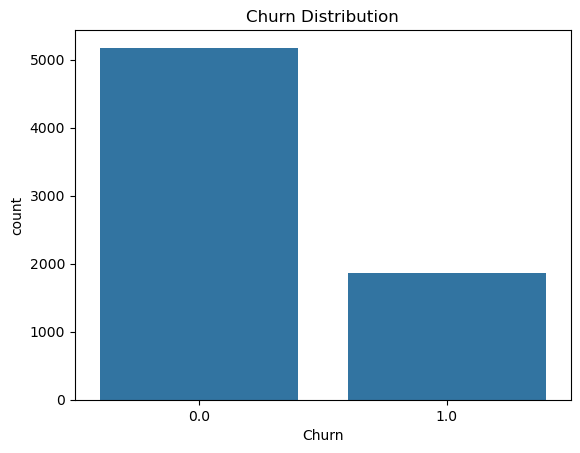

In [19]:
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

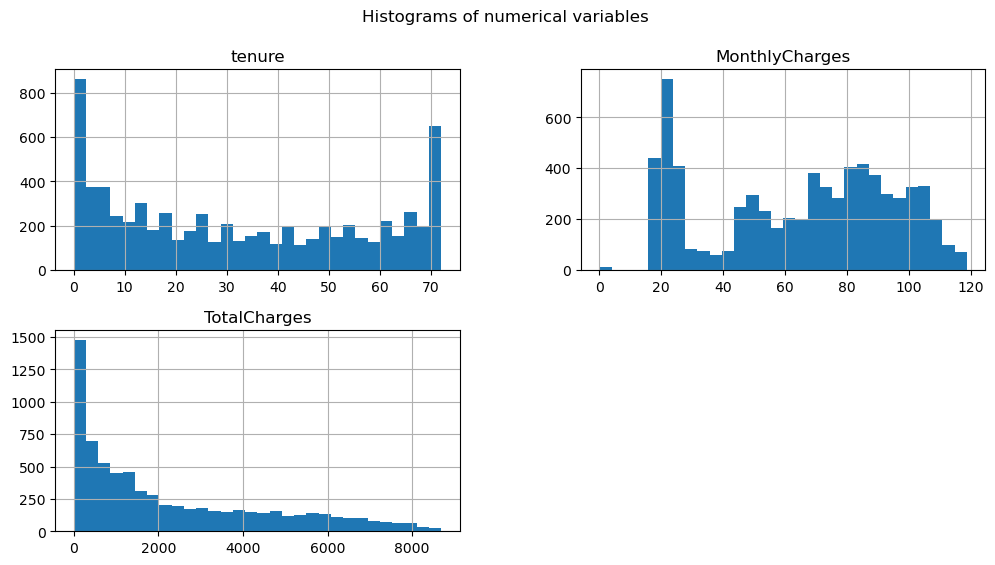

In [20]:
#histogram for numerical variables
df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=30, figsize=(12, 6))
plt.suptitle("Histograms of numerical variables")
plt.show()

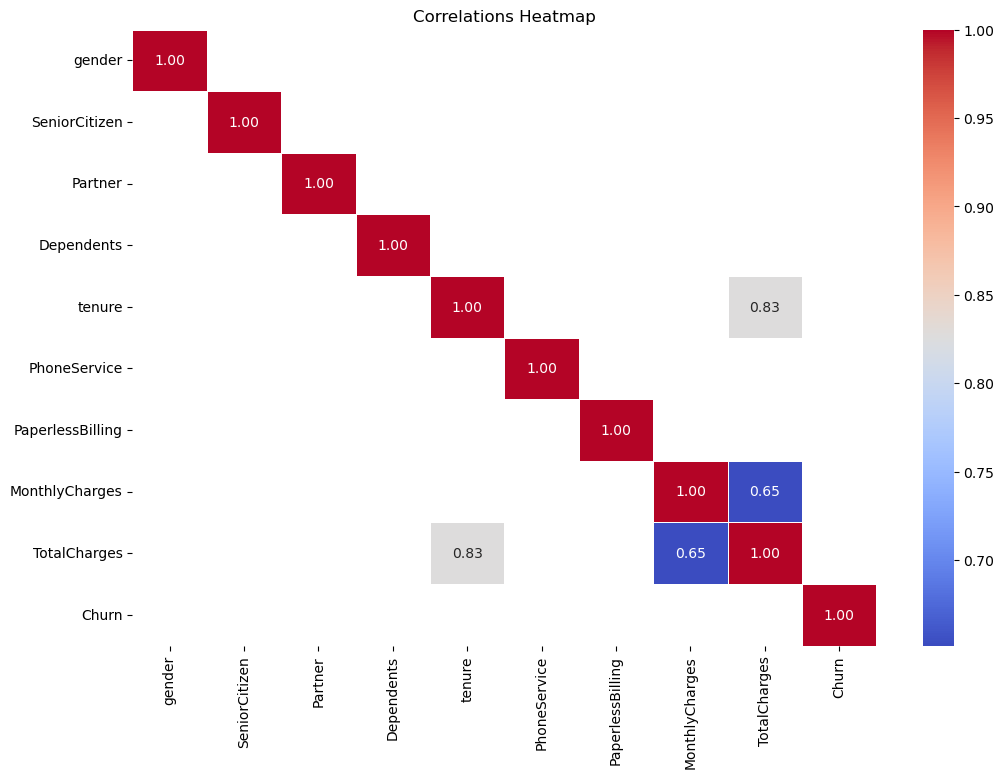

In [21]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
high_corr = corr_matrix[abs(corr_matrix) > 0.6]
sns.heatmap(high_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlations Heatmap")
plt.show()

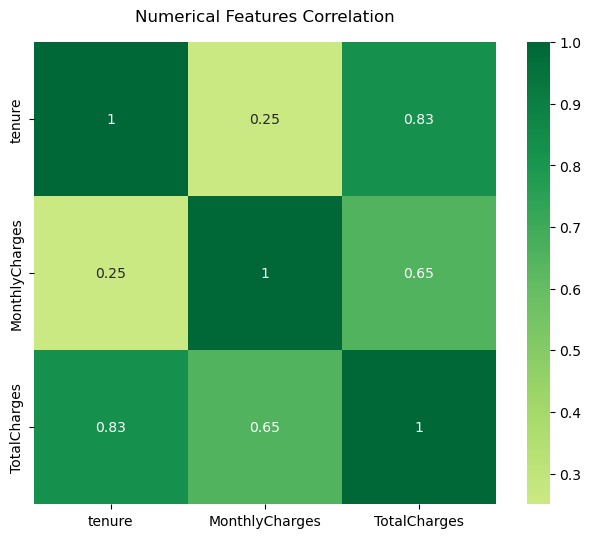

In [22]:
selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges']  
plt.figure(figsize=(8, 6))
sns.heatmap(df[selected_features].corr(),
            annot=True,
            cmap='RdYlGn',
            center=0,
            square=True)  
plt.title('Numerical Features Correlation', pad=15)
plt.show()

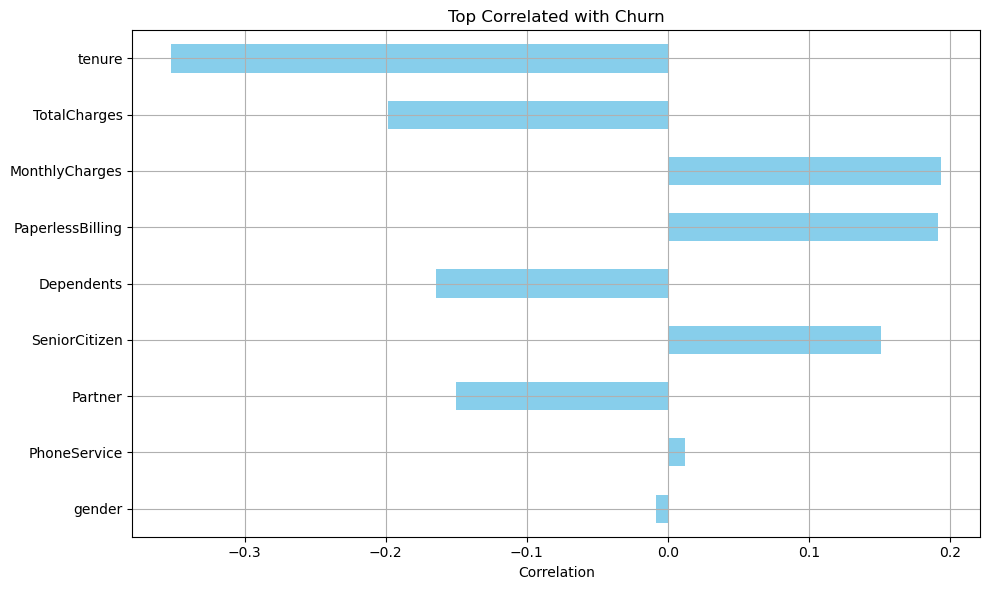

In [23]:
churn_corr = df.corr(numeric_only=True)['Churn'].drop('Churn')
top_corr = churn_corr.reindex(churn_corr.abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 6))
top_corr.plot(kind='barh', color='skyblue')
plt.title("Top Correlated with Churn")
plt.xlabel("Correlation")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Engineering

In [25]:
df['MonthlyPerTenure'] = df['MonthlyCharges'] / (df['tenure'] + 1)

In [26]:
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['NumServices'] = df[service_cols].eq('Yes').sum(axis=1)

In [27]:
df['AutoPay'] = df['PaymentMethod'].str.contains('automatic', case=False).astype(int)

In [28]:
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'], drop_first= True) 

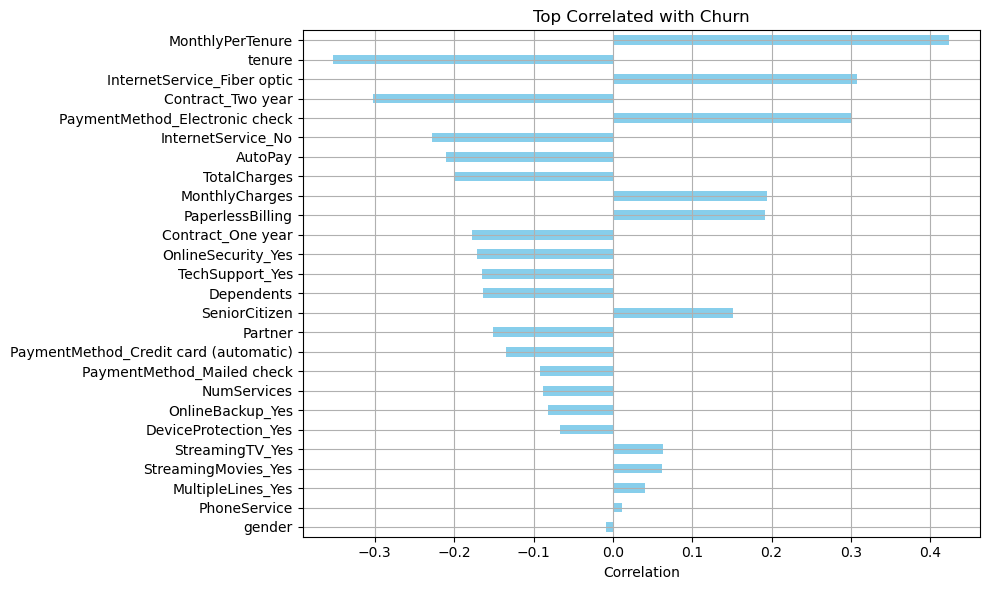

In [29]:
churn_corr = df.corr(numeric_only=True)['Churn'].drop('Churn')
top_corr = churn_corr.reindex(churn_corr.abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 6))
top_corr.plot(kind='barh', color='skyblue')
plt.title("Top Correlated with Churn")
plt.xlabel("Correlation")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

# Model Training

In [31]:
from sklearn.model_selection import train_test_split

x= df.drop(['customerID', 'Churn'], axis=1)
y= df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


=== Random Forest ===
ROC AUC: 0.8207
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1035
         1.0       0.61      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409

Best Threshold: 0.23 | Best F1: 0.61

Classification Report at Optimized Threshold (0.23):
              precision    recall  f1-score   support

         0.0       0.91      0.70      0.79      1035
         1.0       0.49      0.80      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.74      1409



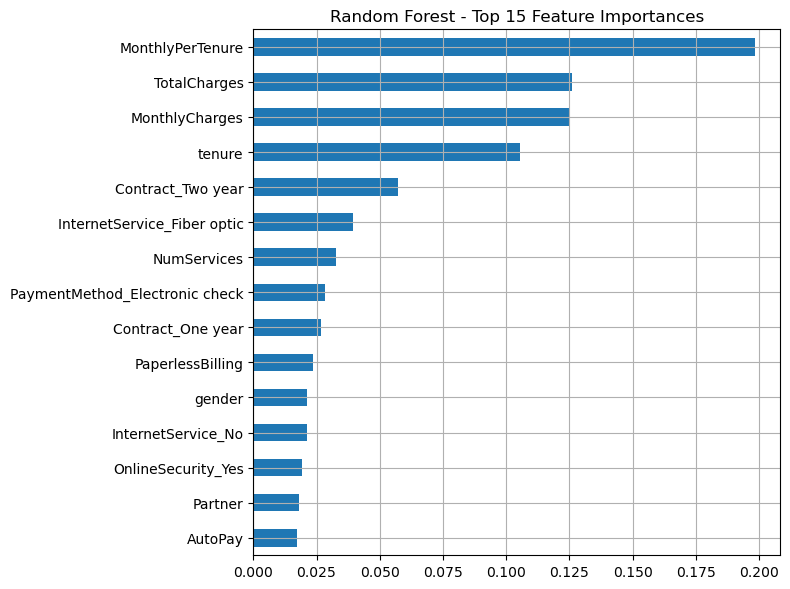


=== XGBoost ===


C:\Users\Hasti.Javid\App\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:43:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


ROC AUC: 0.8223
              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83      1035
         1.0       0.54      0.70      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409

Best Threshold: 0.5 | Best F1: 0.61

Classification Report at Optimized Threshold (0.5):
              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83      1035
         1.0       0.54      0.70      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409



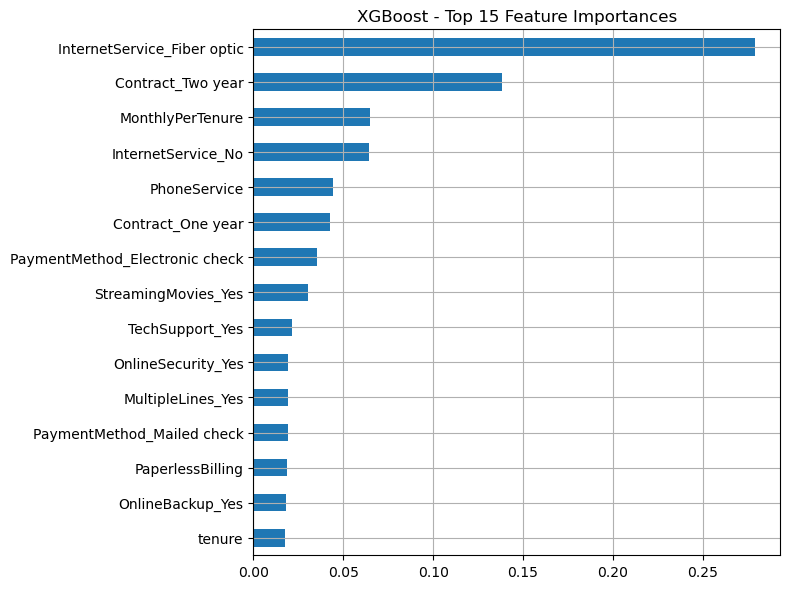


=== LightGBM ===
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 887
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
ROC AUC: 0.832
              precision    recall  f1-score   support

         0.0       0.89      0.75      0.82      1035
         1.0       0.52      0.73      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409

Best Thr

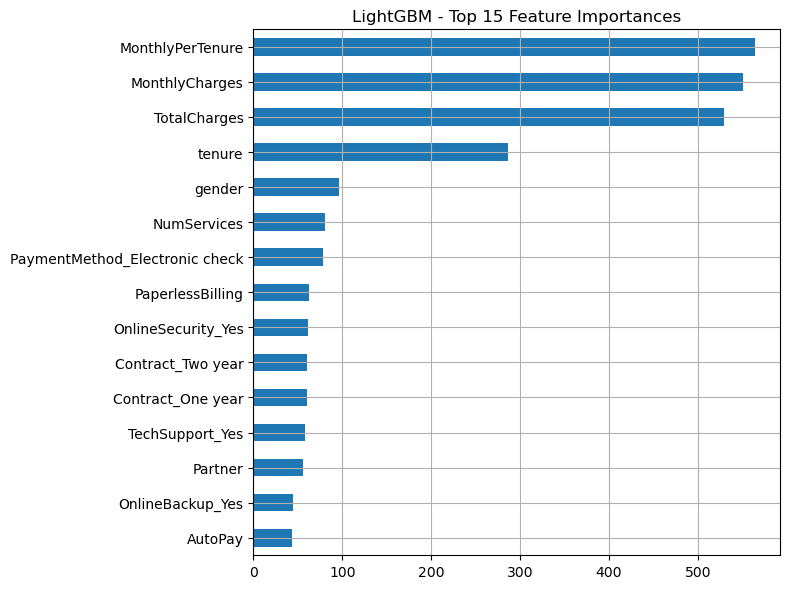

In [32]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state = 42, class_weight = 'balanced'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight = 2.77),
    "LightGBM": LGBMClassifier(class_weight = 'balanced')
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]
    
    print("ROC AUC:", round(roc_auc_score(y_test, y_prob), 4))
    print(classification_report(y_test, y_pred))
    
    #Threshold Optimization
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_idx = np.argmax(f1_scores)
    best_thresh = thresholds[best_idx]
    
    print(f"Best Threshold: {round(best_thresh, 2)} | Best F1: {round(f1_scores[best_idx], 2)}")
    
    y_pred_thresh = (y_prob >= best_thresh).astype(int)
    print(f"\nClassification Report at Optimized Threshold ({round(best_thresh, 2)}):")
    print(classification_report(y_test, y_pred_thresh))
    
    #Feature Importance Plot
    importances = model.feature_importances_
    feat_imp = pd.Series(importances, index=x.columns).sort_values(ascending=False)
    feat_imp.head(15).sort_values().plot(kind='barh', figsize=(8, 6))
    plt.title(f"{name} - Top 15 Feature Importances")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

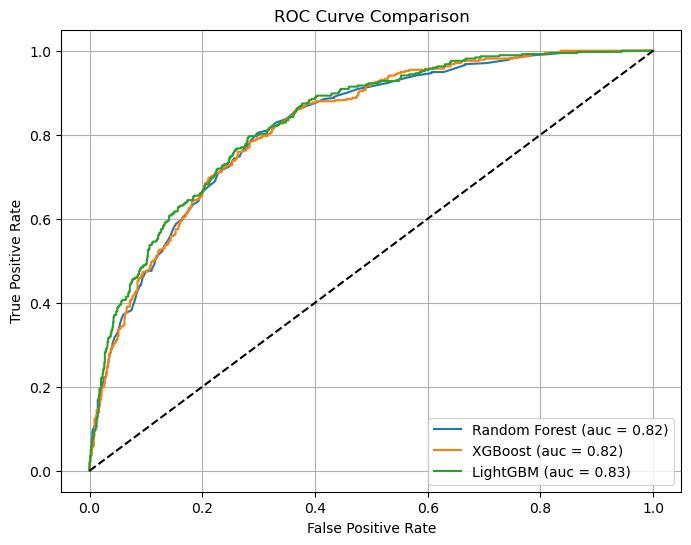

In [33]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _= roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (auc = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

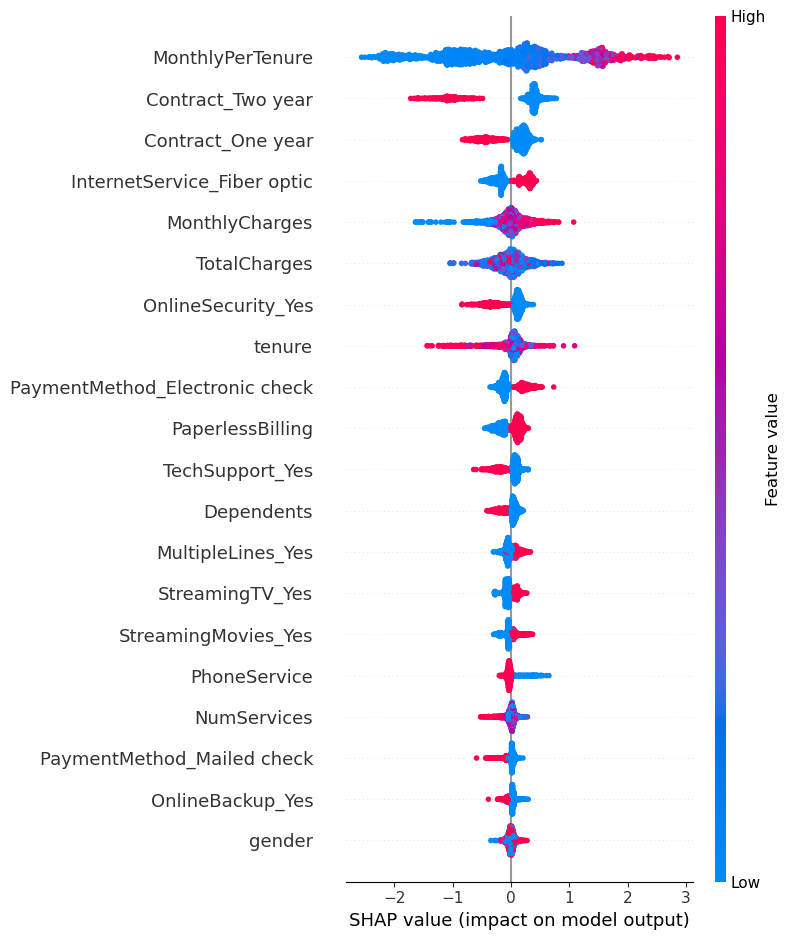

In [34]:
import shap

model = models["LightGBM"]

explainer = shap.Explainer(model)
shap_values = explainer(x_test)
shap.summary_plot(shap_values, x_test)

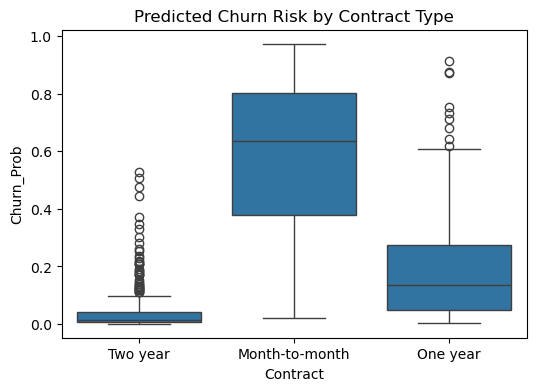

In [37]:
x_test_copy = x_test.copy()
x_test_copy['Churn_Prob'] = model.predict_proba(x_test)[:, 1]
x_test_copy['Churn_Predicted'] = (x_test_copy['Churn_Prob'] >= 0.42).astype(int)
x_test_copy['Actual_Churn'] = y_test.values

x_test_copy.sort_values('Churn_Prob', ascending=False).head(10)

contract_cols = ['Contract_One year', 'Contract_Two year']

def infer_contract(row):
    if row['Contract_Two year'] == 1:
        return 'Two year'
    elif row['Contract_One year'] == 1:
        return 'One year'
    else:
        return 'Month-to-month'

x_test_copy['Contract'] = x_test.loc[:, contract_cols].apply(infer_contract, axis=1)

plt.figure(figsize=(6, 4))
sns.boxplot(data=x_test_copy, x='Contract', y='Churn_Prob')
plt.title('Predicted Churn Risk by Contract Type')
plt.show()

# 📝 Final Report: Customer Churn Prediction

## ✅ Objective:
Predict which customers are likely to churn and understand the key drivers behind their decisions.

## 🔍 Data Summary:
- Total customers: ~7,000
- Churn rate: ~26%
- Features include: contract type, tenure, internet services, payment method, etc.

## 🧠 Best Model: LightGBM
- **ROC AUC:** 0.83
- **Best Threshold:** 0.42
- **Optimized F1 Score:** 0.62
- **Precision (Churn):** 0.50
- **Recall (Churn):** 0.80

## 📊 Top Churn Drivers (SHAP Analysis):
- High `MonthlyPerTenure` → higher churn risk
- Long contracts (e.g., `Contract_Two year`) → lower churn
- `InternetService_Fiber optic` → higher churn
- Payment by `Electronic check` → higher churn

## 💡 Actionable Insight:
Focus retention efforts on:
- Short-contract, high-paying customers
- Fiber users with high charges
- Customers paying by electronic check